# Use Case 7: Trans genetic effects

Trans genetic effects occur when a DNA mutation in one gene affects a different gene. To better understand the effects of DNA mutation, we will investigate downstream proteins potentially influenced by these mutations. Two prominent cancer genes, ARID1A and TP53, will be examined.

# Part I: ARID1A

ARID1A, a chromatin remodeling protein, may impact the transcription of numerous genes. We will analyze the proteins interacting with ARID1A to discover possible trans effects.

# Step 1: Import Libraries

Begin by importing standard Python libraries, such as pandas and seaborn for data analysis and visualization, scipy.stats for statistical computations, matplotlib for creating static, animated, and interactive visualizations in Python, numpy for mathematical computations, and CPTAC (Clinical Proteomic Tumor Analysis Consortium) for accessing CPTAC data.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import cptac
import cptac.utils as ut

en = cptac.Ucec()

We will conduct our analysis using endometrial cancer data, but the methods used can be applied to other cancer types in the CPTAC dataset as well.

# Step 2: Retrieve Interacting Proteins

We will acquire a list of proteins known to directly interact with ARID1A using the Bioplex process, which identifies proteins in direct physical contact. The CPTAC package offers a function called get_interacting_proteins_bioplex, which yields a list of proteins interacting with a specified gene.

In [2]:
gene = "ARID1A"
omics = "proteomics"
interacting_proteins = ut.get_interacting_proteins_bioplex(gene)
print("Interacting Proteins:")
print(interacting_proteins)

Interacting Proteins:
['SMARCC2', 'DPF2', 'DPF1', 'SS18L2', 'SMARCE1', 'TEX13B', 'SMARCD1', 'WWP2', 'BCL7A', 'BCL7C', 'SS18', 'SMARCB1', 'DPF3']


# Step 3: Obtain Omics Data

Next, create a new dataframe containing protein measurements for ARID1A and its interacting proteins using the en.join_omics_to_mutations method. If the proteomics data doesn't recognize one of the genes in your request, the method will raise a warning and fill the missing values with NaN.

In [3]:
protdf = en.join_omics_to_mutations(mutations_genes=gene,
                                    mutations_source='washu',
                                    omics_name=omics,
                                    omics_source='umich',
                                    omics_genes=interacting_proteins)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
protdf.head()

cptac warning: The following columns were not found in the umich proteomics dataframe, so they were inserted into joined table, but filled with NaN: DPF1, TEX13B (C:\Users\sabme\anaconda3\lib\site-packages\cptac\cancers\cancer.py, line 525)
cptac warning: Your version of cptac (1.5.1) is out-of-date. Latest is 1.5.0. Please run 'pip install --upgrade cptac' to update it. (C:\Users\sabme\anaconda3\lib\threading.py, line 910)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 107 samples for the ARID1A gene (C:\Users\sabme\anaconda3\lib\site-packages\cptac\cancers\cancer.py, line 325)


Name,BCL7A_umich_proteomics,BCL7A_umich_proteomics,BCL7C_umich_proteomics,DPF1_umich_proteomics,DPF2_umich_proteomics,DPF3_umich_proteomics,SMARCB1_umich_proteomics,SMARCC2_umich_proteomics,SMARCC2_umich_proteomics,SMARCD1_umich_proteomics,SMARCE1_umich_proteomics,SS18_umich_proteomics,SS18L2_umich_proteomics,TEX13B_umich_proteomics,WWP2_umich_proteomics,ARID1A_Mutation,ARID1A_Location,ARID1A_Mutation_Status_washu_somatic_mutation,ARID1A_Mutation_Status_washu_somatic_mutation,Sample_Status
Patient_ID,,,,,,,,,,,,,,,,,,,,
C3L-00006,NaN,0.342403,-0.636899,NaN,-0.341313,NaN,-0.276047,-0.518042,-0.147223,-0.180085,-0.255385,-0.184546,NaN,NaN,0.102838,[Missense_Mutation],[p.T2121P],Single_mutation,Single_mutation,Tumor
C3L-00008,0.279261,0.043996,-0.853702,NaN,-0.613538,NaN,-0.412291,-0.575983,-0.913941,-0.242887,-0.506047,-0.045882,-0.069976,NaN,0.283238,"[Nonsense_Mutation, Frame_Shift_Del]","[p.Q403*, p.D1850Tfs*33]",Multiple_mutation,Multiple_mutation,Tumor
C3L-00032,NaN,0.012216,-0.405616,NaN,-0.311407,NaN,-0.227223,-0.550890,-0.500229,-0.609800,-0.394279,-0.353417,-0.524786,NaN,0.225262,[Wildtype_Tumor],[No_mutation],NaN,NaN,Tumor
C3L-00084,NaN,0.006604,0.209216,NaN,0.453395,NaN,0.311589,-0.041216,-0.520971,1.456642,0.582811,0.309990,NaN,NaN,-0.191736,[Wildtype_Tumor],[No_mutation],NaN,NaN,Tumor
C3L-00090,NaN,0.548479,-0.049807,NaN,0.201228,NaN,0.364734,-0.063142,0.412197,0.210401,0.170752,0.061522,0.056844,NaN,0.071053,[Wildtype_Tumor],[No_mutation],NaN,NaN,Tumor


# Step 4: Simplify Mutation Status

When observing the mutations, we are not concerned about the number of mutations a sample has, so we want to simplify the mutation status to either "Mutated" or "Wildtype".

In [4]:
protdf = protdf.loc[:,~protdf.columns.duplicated()]
for ind, row in protdf.iterrows():
    mutation_status = row["ARID1A_Mutation_Status_washu_somatic_mutation"]
    if mutation_status == 'Single_mutation' or mutation_status == 'Multiple_mutation':
        protdf.at[ind,'Gene Mutation Status'] = 'Mutated'
    else:
        protdf.at[ind,'Gene Mutation Status'] = 'Wildtype'
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status_washu_somatic_mutation", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

# Step 5: Conduct T-tests

Carry out t-tests for each protein to identify significant differences in protein abundances between the wildtype and mutated samples.

In [5]:
col_list = list(protdf.columns)
col_list.remove('Gene Mutation Status')

wrap_results = ut.wrap_ttest(protdf, 'Gene Mutation Status', col_list)

if wrap_results is not None:
    print(wrap_results)
else:
    print("No significant comparisons found")

                 Comparison   P_Value
0     DPF2_umich_proteomics  0.000017
1    BCL7C_umich_proteomics  0.000035
2  SMARCC2_umich_proteomics  0.000413
3  SMARCB1_umich_proteomics  0.004456
4  SMARCE1_umich_proteomics  0.004670
5  SMARCD1_umich_proteomics  0.015895


# Step 6: Visualize the Results

The final step involves visualizing the results with a plot. Here, a volcano plot is used to represent the differentially expressed proteins between the mutated and wildtype groups.

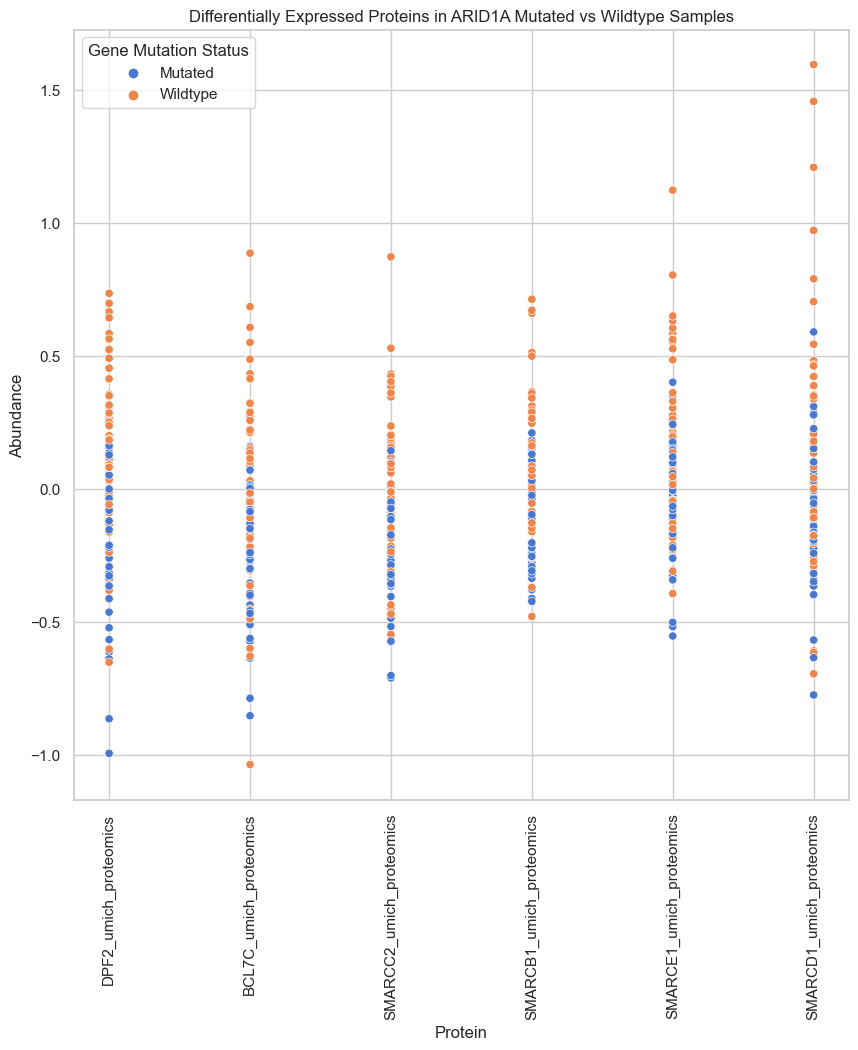

In [6]:
if wrap_results is not None:
    wrap_results = wrap_results.set_index('Comparison')

    # Correct p-values using Bonferroni adjustment method
    wrap_results['P_Value'] = wrap_results['P_Value'].apply(lambda x: x*len(col_list))
    
    # Create a significance threshold line for the plot (default p-value = 0.05)
    wrap_results['P_Value'][wrap_results['P_Value'] > 0.05] = np.nan

    # Create a dataframe for mutated and wildtype data
    sig_cols = list(wrap_results.index)
    sig_mut_and_wildtype = protdf.loc[:, sig_cols + ['Gene Mutation Status']]

    # Melt the dataframe to long-form for easier plotting
    long_df = sig_mut_and_wildtype.melt(id_vars = 'Gene Mutation Status', var_name = 'Protein', value_name = 'Abundance')

    # Create the plot
    plt.figure(figsize=(10,10))
    sns.set(style="whitegrid", palette="muted")
    volcano_plot = sns.scatterplot(x=long_df['Protein'], y=long_df['Abundance'], hue=long_df['Gene Mutation Status'])
    volcano_plot.set_title("Differentially Expressed Proteins in ARID1A Mutated vs Wildtype Samples")
    plt.xticks(rotation=90)
    plt.show()

This will generate a scatter plot of proteins whose abundances significantly differ between ARID1A mutated and wildtype samples. The proteins above the line are those with p-values less than the significance threshold of 0.05, following Bonferroni correction for multiple comparisons.

Note that this example examines ARID1A's trans-effects on the protein level, but this concept could be applied to mRNA, methylation, or other omic levels. Understanding trans-genetic effects is crucial to delineate the complexity of disease, with applications in drug target identification and personalized medicine.

# Part II: Example with TP53

We will now look at TP53: a tumor suppressing gene that is very important in helping prevent mutation, as well as repairing damaged DNA in cells [(Wikipedia)](https://en.wikipedia.org/wiki/P53).

We will use the same steps as above, this time without separated code blocks. Because we are not sure which proteins might be affected, we will look for trans effects in all the proteomics data instead of just the interacting proteins from bioplex. Due to the high number of comparisons, this will take a little bit of time. In the end, we will have a list of genes affected by TP53.

In [7]:
gene = "TP53"
print("\nGene: ", gene)

# Step 1: Create dataframe in order to do comparisons with wrap_ttest
# Note that here we do not pass any values for 'omics_genes', so it will use all available genes
protdf = en.join_omics_to_mutations(mutations_genes=[gene],
                                    mutations_source="washu",
                                    omics_name=omics,
                                    omics_source="umich")
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

protdf = protdf.loc[:,~protdf.columns.duplicated()]

for ind, row in protdf.iterrows():
    mutation_status = row["TP53_Mutation_Status_washu_somatic_mutation"]
    if mutation_status == 'Single_mutation' or mutation_status == 'Multiple_mutation':
        protdf.at[ind,'Gene Mutation Status'] = 'Mutated'
    else:
        protdf.at[ind,'Gene Mutation Status'] = 'Wildtype'

        
# Step 2: Format the dataframe to set it up properly for our t-test
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status_washu_somatic_mutation", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)


#Step 3: Make list of columns to be compared using t-tests
col_list = list(protdf.columns)
col_list.remove('Gene Mutation Status')

    
#Step 4: Call wrap_ttest, pass in formatted dataframe, print results
print("Doing t-test comparisons\n")
wrap_results = ut.wrap_ttest(protdf, 'Gene Mutation Status', col_list)

if wrap_results is not None:
        print(wrap_results)
        print("\n\n")


Gene:  TP53


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 129 samples for the TP53 gene (C:\Users\sabme\anaconda3\lib\site-packages\cptac\cancers\cancer.py, line 325)


Doing t-test comparisons

                   Comparison   P_Value
0      STAT2_umich_proteomics  0.000002
1     DLGAP5_umich_proteomics  0.000030
2   SLC4A1AP_umich_proteomics  0.000053
3      CMTR1_umich_proteomics  0.000126
4      TRMT6_umich_proteomics  0.000165
..                        ...       ...
72     RRP36_umich_proteomics  0.047035
73    TOM1L1_umich_proteomics  0.048238
74    KIF13B_umich_proteomics  0.048484
75    PARP14_umich_proteomics  0.048569
76      BDH2_umich_proteomics  0.049898

[77 rows x 2 columns]





Each of the proteins shown can be individually analyzed in the same manner that we showed above. It's worth noting that with some genes this list might be relatively small because our wrap_ttest does Bonferroni correction, so the cutoff for "significance" is very strict. For further ideas about how to analyze larger lists of genes, refer to usecase 5.